In [1]:
# importing pandas 
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import joblib
import import_ipynb
from PIL import Image
import PIL

In [2]:
# using pandas read_csv function to load the dataset 
df = pd.read_csv("RTA Dataset.csv") 
print(df.head())

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [3]:
# print the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [4]:
# Find the number of missing values present in each column
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


<Axes: xlabel='Accident_severity'>

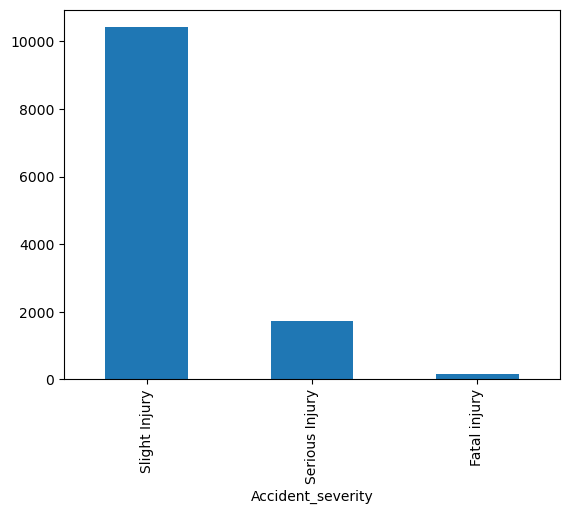

In [5]:
# target variable classes counts and bar plot
print(df['Accident_severity'].value_counts())
df['Accident_severity'].value_counts().plot(kind='bar')

<Axes: xlabel='Educational_level'>

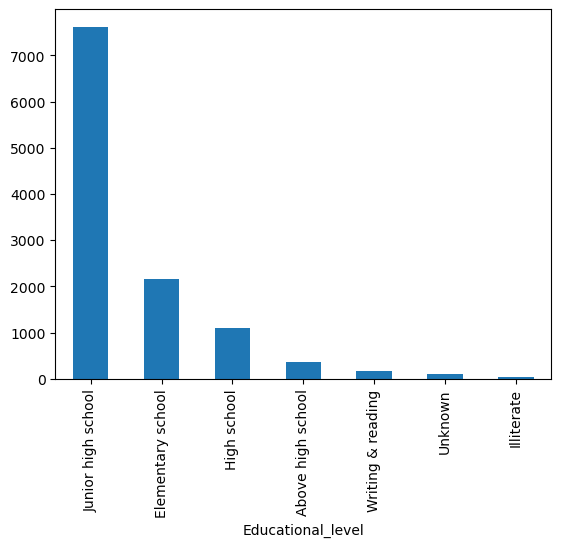

In [6]:
# Education levels of car drivers
df['Educational_level'].value_counts().plot(kind='bar')

C:\Users\GAYATHRE B\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GAYATHRE B\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 600x500 with 0 Axes>

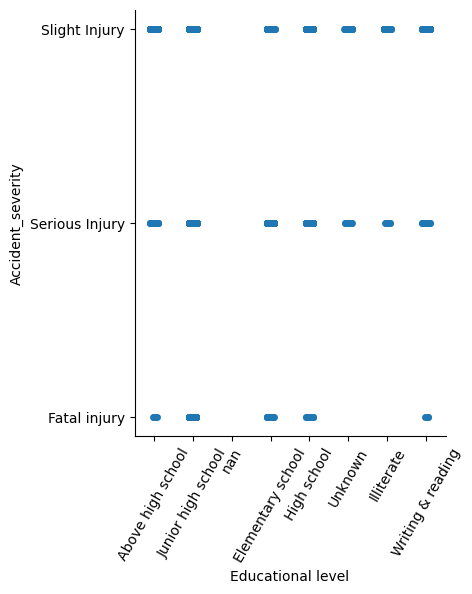

In [7]:
# plot a point plot for categorical features and target variable
plt.figure(figsize=(6,5))
sns.catplot(x='Educational_level', y='Accident_severity', data=df)
plt.xlabel("Educational level")
plt.xticks(rotation=60)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

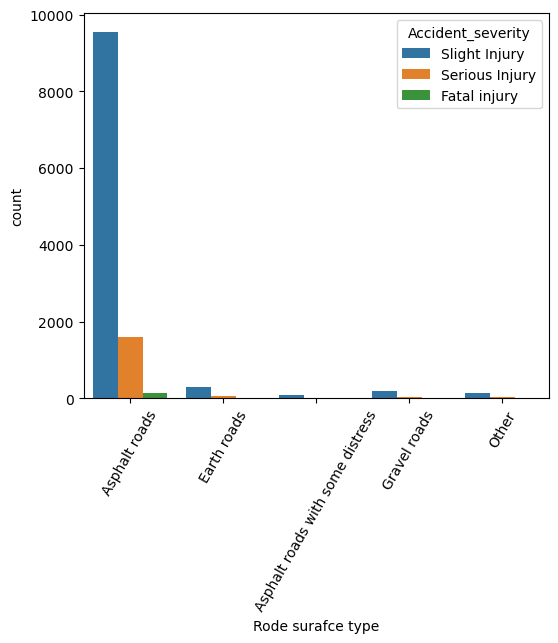

In [8]:
# plot the bar plot of road_surface_type and accident severity feature
plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=df)
plt.xlabel('Rode surafce type')
plt.xticks(rotation=60)
plt.show

In [9]:
# convert object type column into datetime datatype column
df['Time'] = pd.to_datetime(df['Time'])

# Extrating 'Hour_of_Day' feature from the Time column
new_df = df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time', axis=1)
n_df.head()


C:\Users\GAYATHRE B\AppData\Local\Temp\ipykernel_15080\2396978915.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


Road_surface_conditions
Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

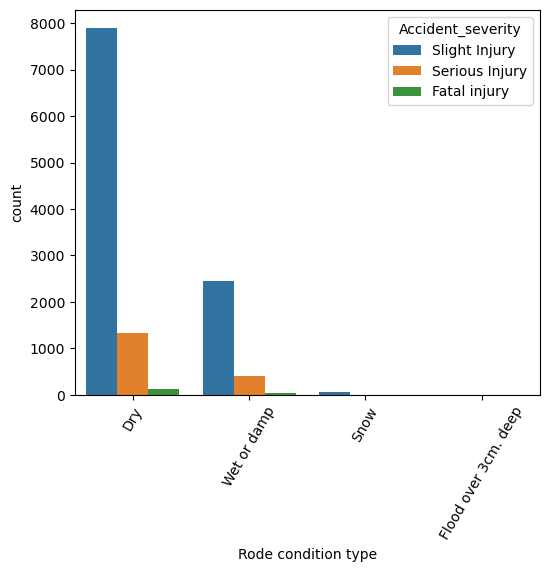

In [10]:
print(df['Road_surface_conditions'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_conditions', hue='Accident_severity', data=df)
plt.xlabel('Rode condition type')
plt.xticks(rotation=60)
plt.show

In [11]:
pivot_df = pd.pivot_table(data=df, 
               index='Road_surface_conditions', 
               columns='Accident_severity',
               aggfunc='count')

fatal_df = pivot_df['Road_surface_type']
fatal_df.fillna(0, inplace=True)
fatal_df['sum_of_injuries'] = fatal_df['Fatal injury'] + fatal_df['Serious Injury'] + fatal_df['Slight Injury']
fatal_df

C:\Users\GAYATHRE B\AppData\Local\Temp\ipykernel_15080\2328845152.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_df.fillna(0, inplace=True)
C:\Users\GAYATHRE B\AppData\Local\Temp\ipykernel_15080\2328845152.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_df['sum_of_injuries'] = fatal_df['Fatal injury'] + fatal_df['Serious Injury'] + fatal_df['Slight Injury']


Accident_severity,Fatal injury,Serious Injury,Slight Injury,sum_of_injuries
Road_surface_conditions,,,,
Dry,121.0,1312.0,7774.0,9207.0
Flood over 3cm. deep,0.0,0.0,2.0,2.0
Snow,0.0,4.0,65.0,69.0
Wet or damp,36.0,404.0,2426.0,2866.0


In [12]:
fatal_df_dry = (fatal_df.loc['Dry']/fatal_df.loc['Dry','sum_of_injuries'])*100
fatal_df_dry

Accident_severity
Fatal injury         1.314217
Serious Injury      14.250027
Slight Injury       84.435755
sum_of_injuries    100.000000
Name: Dry, dtype: float64

In [13]:
fatal_df_snow = (fatal_df.loc['Wet or damp']/fatal_df.loc['Wet or damp','sum_of_injuries'])*100
fatal_df_snow

Accident_severity
Fatal injury         1.256106
Serious Injury      14.096301
Slight Injury       84.647592
sum_of_injuries    100.000000
Name: Wet or damp, dtype: float64

In [14]:
df.groupby('Road_surface_conditions')['Accident_severity'].count()

Road_surface_conditions
Dry                     9340
Flood over 3cm. deep       2
Snow                      70
Wet or damp             2904
Name: Accident_severity, dtype: int64

In [15]:
df['Time'] = pd.to_datetime(df['Time'])

In [16]:
obj_cols = [col for col in df.columns if df[col].dtypes == 'object']
obj_cols2 = [col for col in obj_cols if col != 'Accident_severity']
obj_cols2

['Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident']

In [17]:
# remove time column from datafram
new_df = df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time', axis=1)
n_df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13


C:\Users\GAYATHRE B\AppData\Local\Temp\ipykernel_15080\560240611.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))


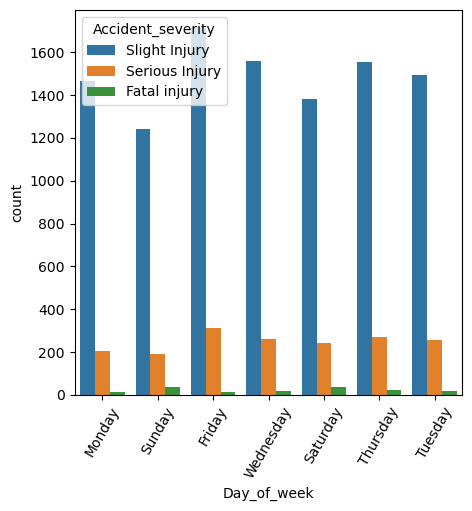

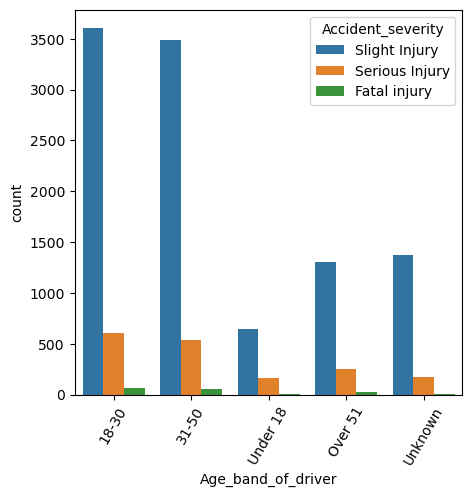

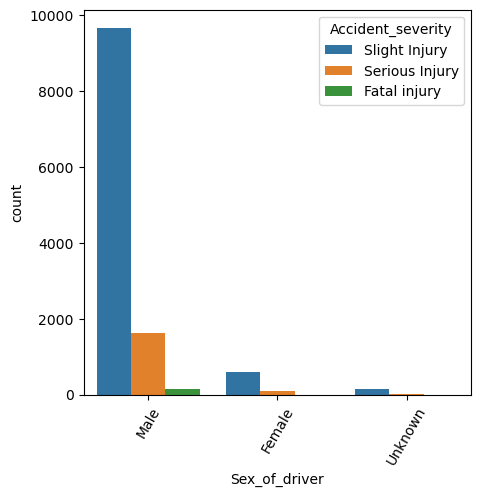

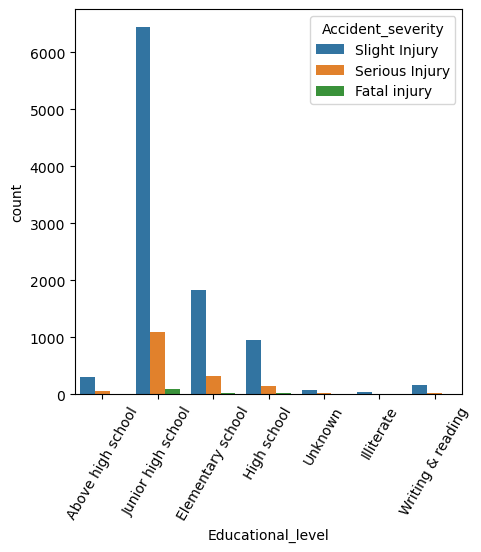

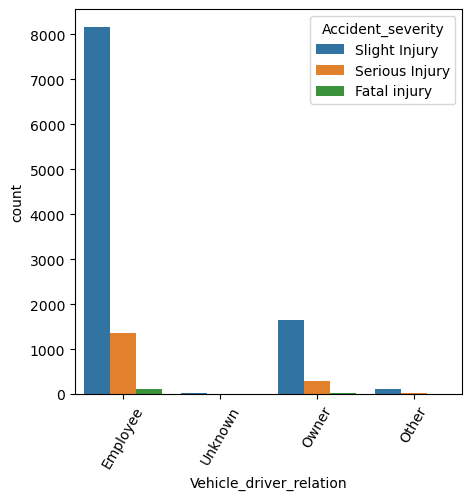

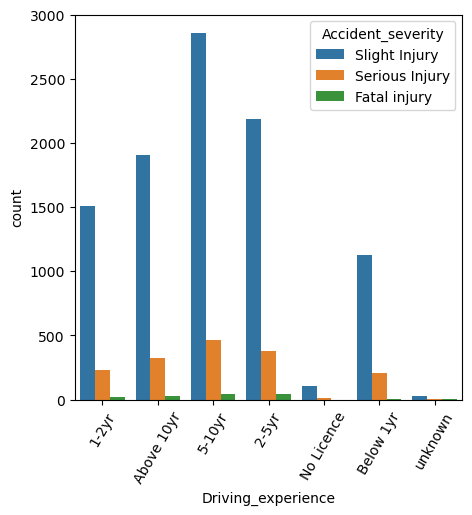

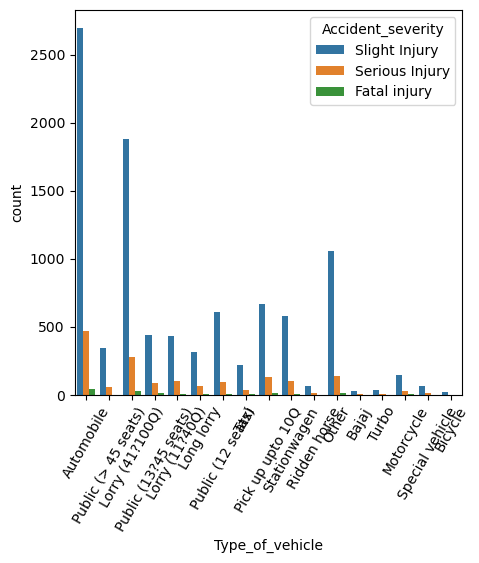

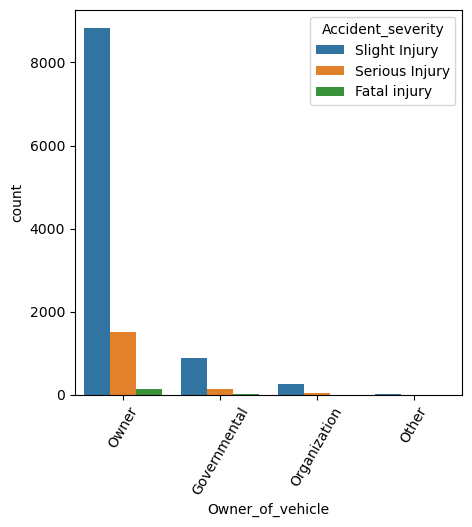

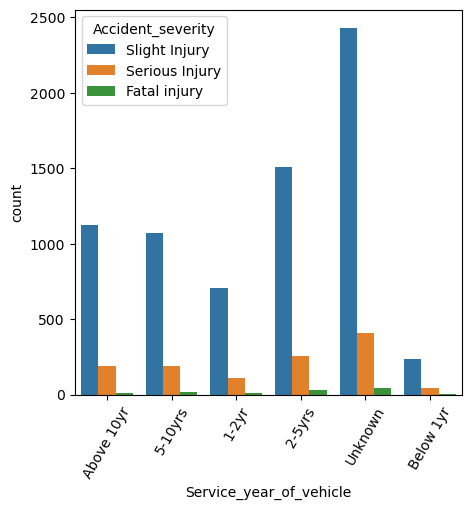

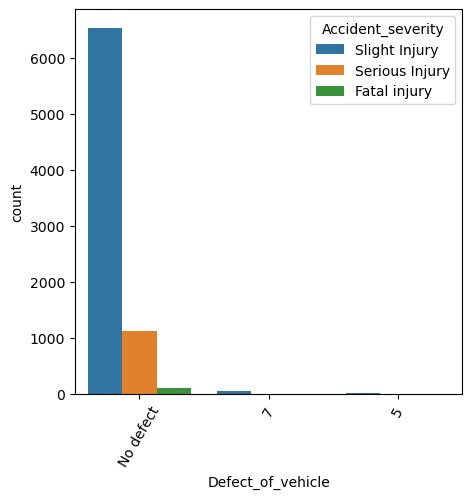

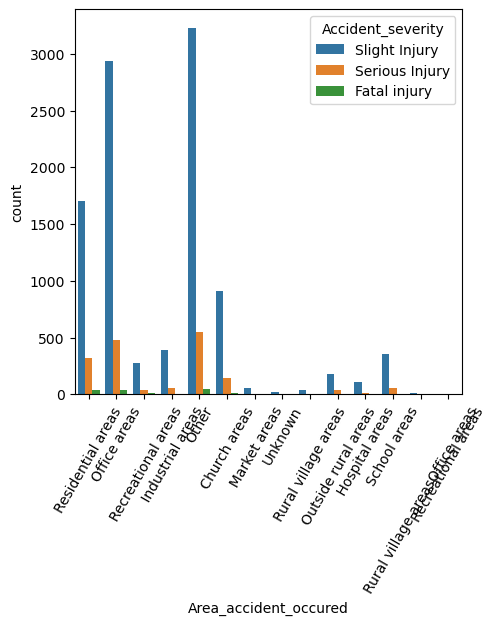

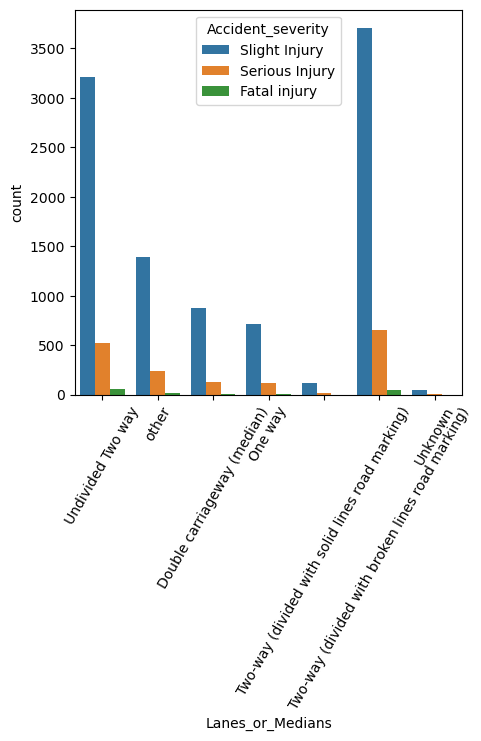

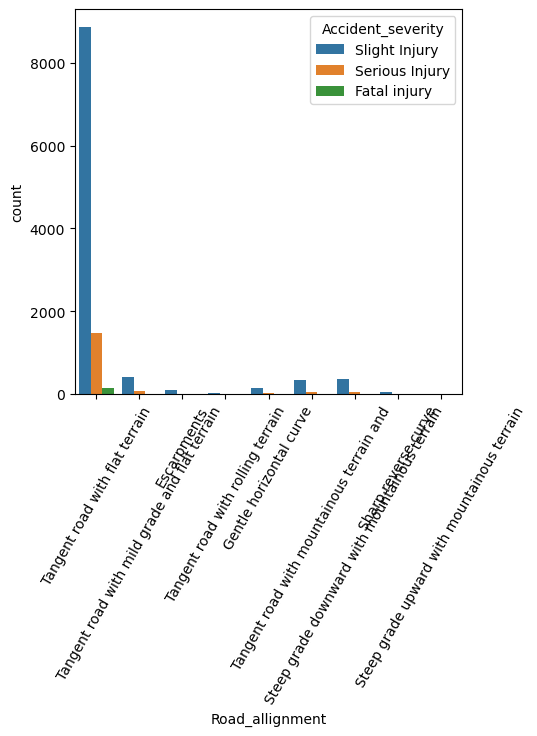

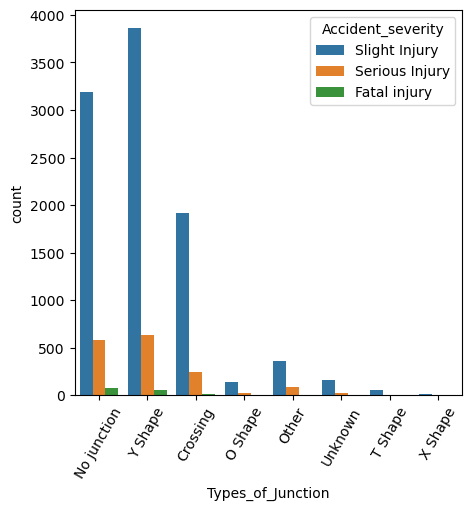

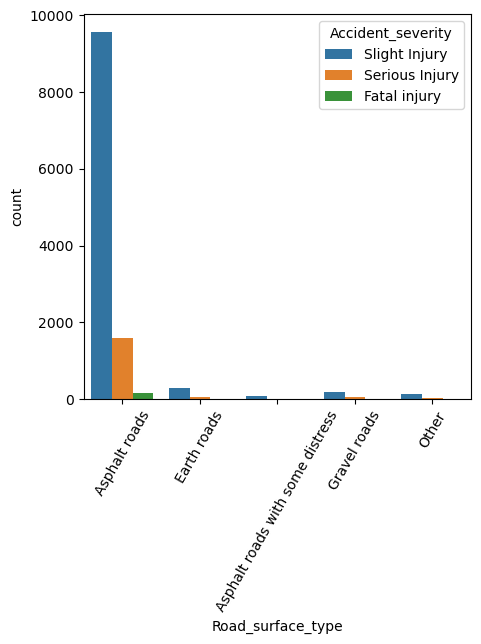

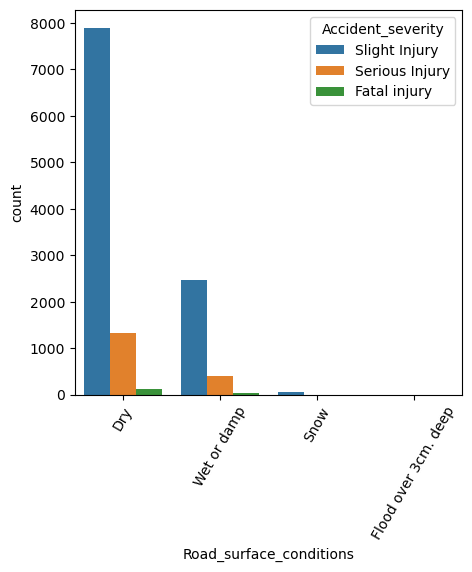

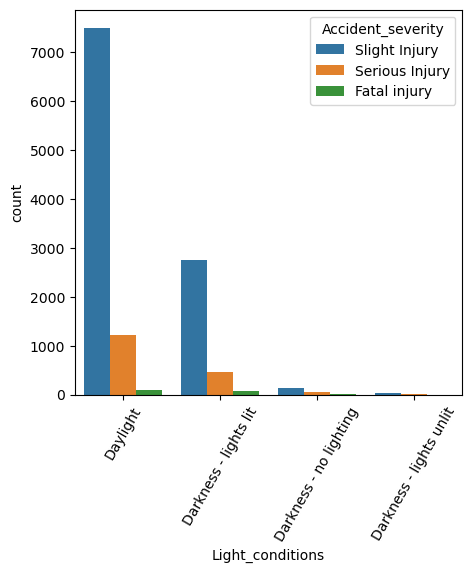

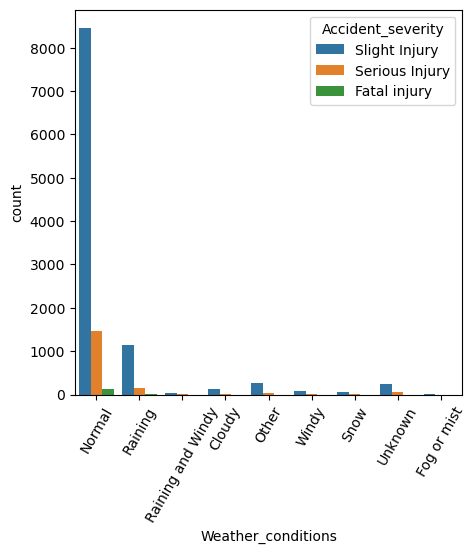

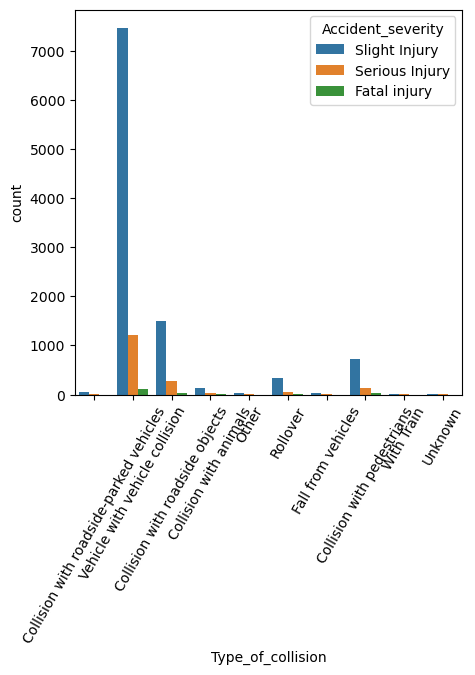

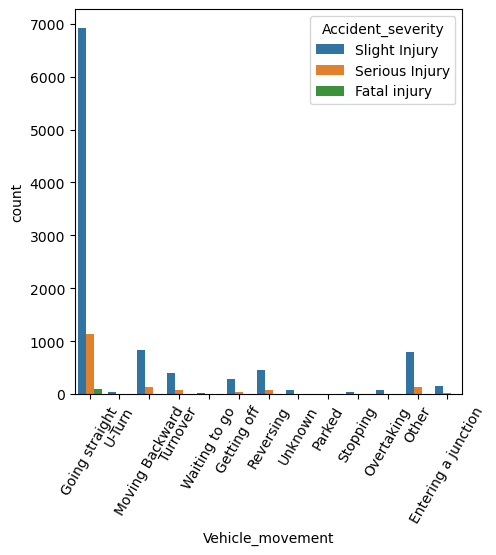

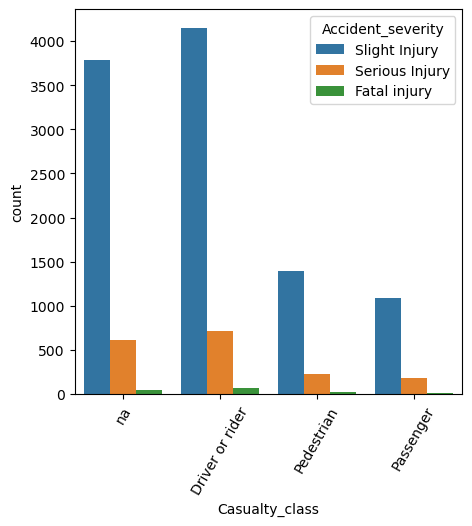

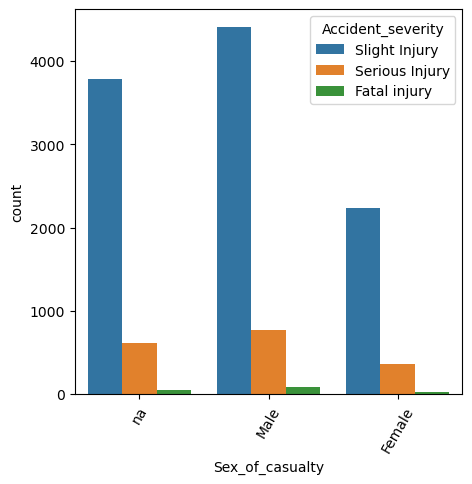

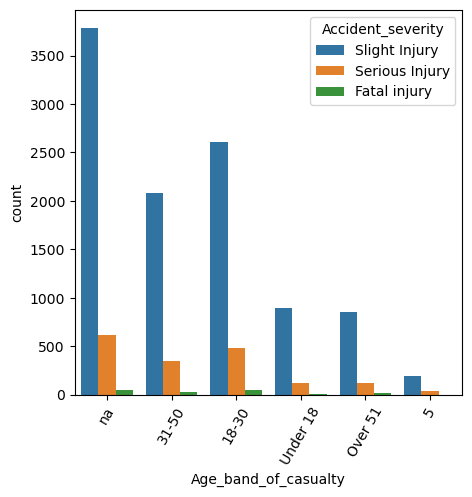

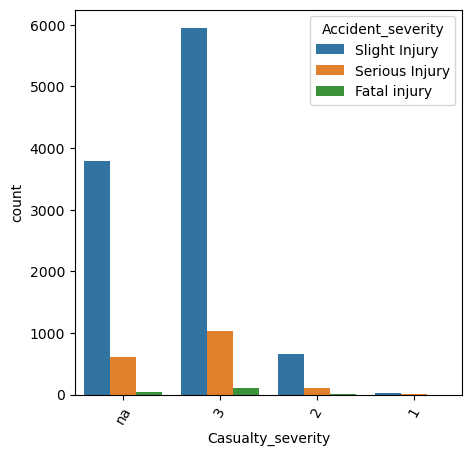

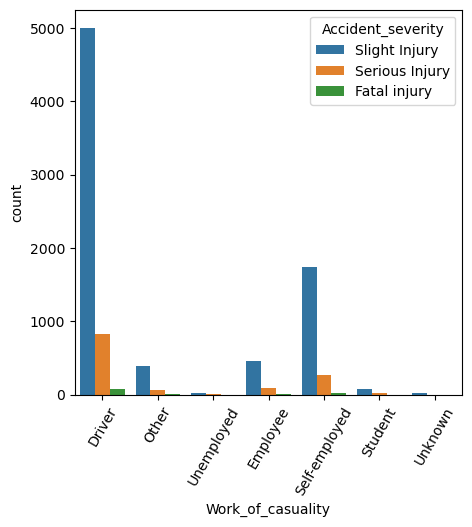

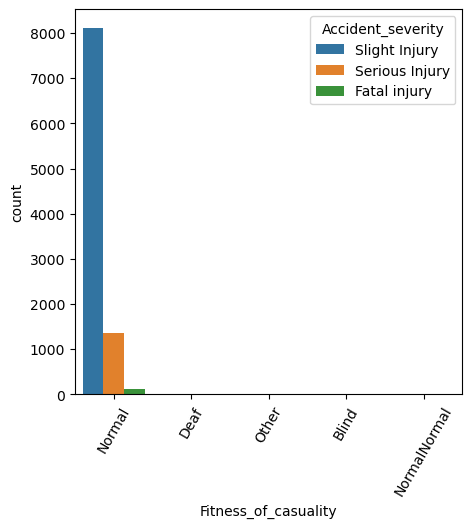

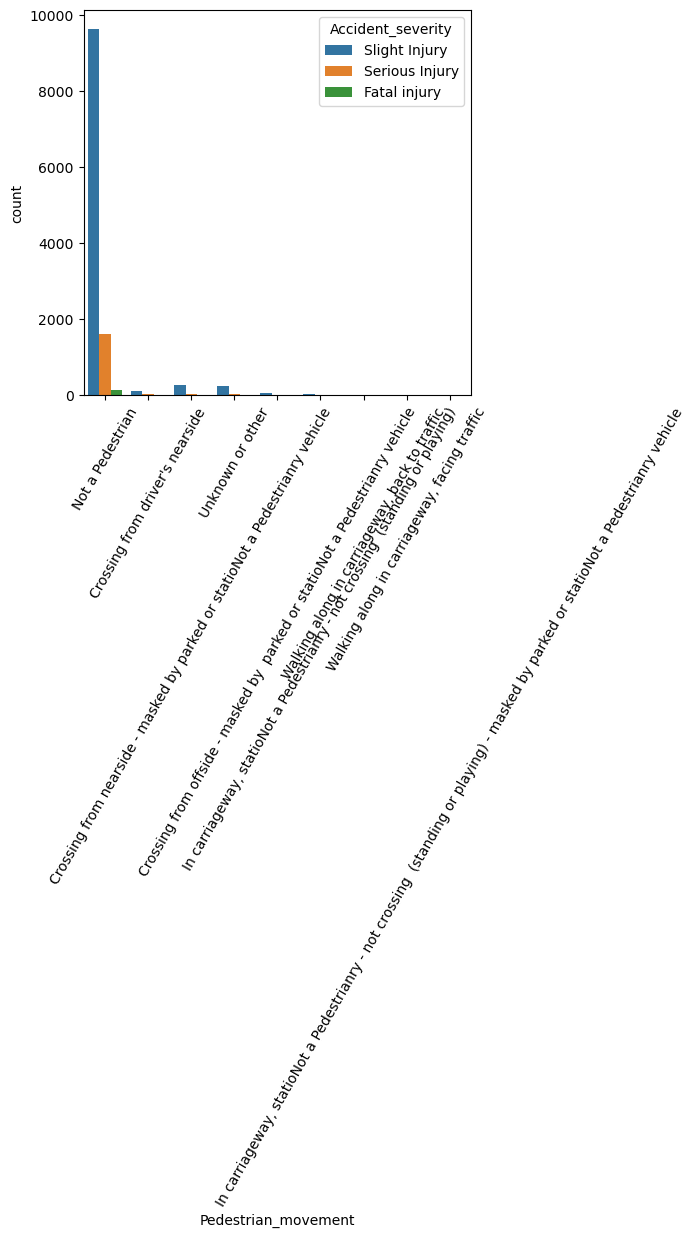

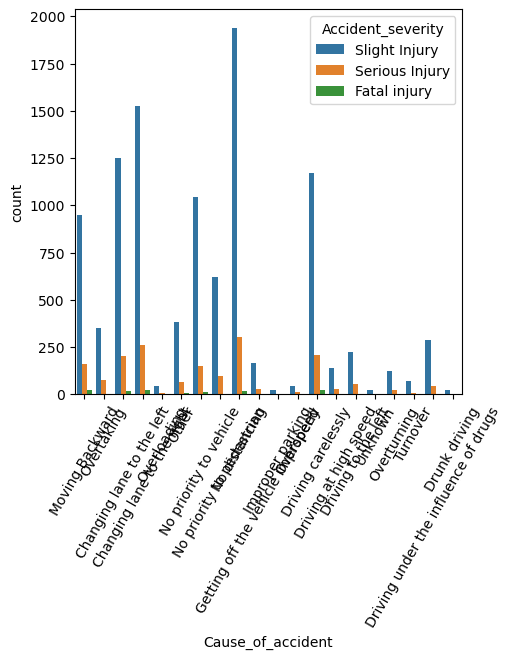

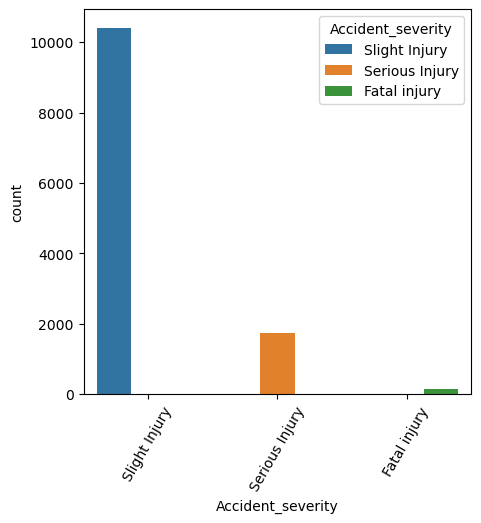

In [18]:
# data visualizationf of categorical cols

def count_plot(col):
    n_df[col].value_counts()
    
    # plot the figure of count plot
    plt.figure(figsize=(5,5))
    sns.countplot(x=col, hue='Accident_severity', data=n_df)
    plt.xlabel(f'{col}')
    plt.xticks(rotation=60)
    plt.show
    
for col in obj_cols:
    count_plot(col)

C:\Users\GAYATHRE B\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 500x500 with 0 Axes>

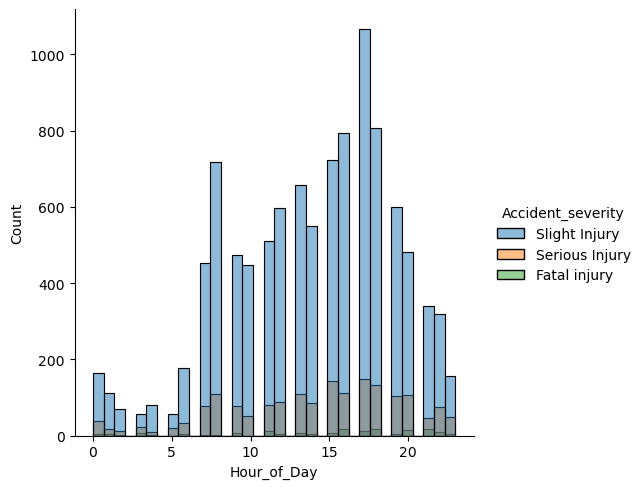

In [19]:
# disribution of hour of the day
plt.figure(figsize=(5,5))
sns.displot(x='Hour_of_Day', hue='Accident_severity', data=n_df)
plt.show()

In [20]:
# feature selection based on visualization (to_be_continue)
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']
len(features)

17

In [21]:
# new dataframe generated
featureset_df = n_df[features]
target = n_df['Accident_severity']

In [22]:
# meta data of the new sub dataset
featureset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12077 non-null  object
 4   Types_of_Junction            11429 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            11575 non-null  object
 8   Vehicle_driver_relation      11737 non-null  object
 9   Type_of_vehicle              11366 non-null  object
 10  Driving_experience           11487 non-null  object
 11  Service_year_of_vehicle      8388 non-null   object
 12  Type_of_collision            12161 non-null  object
 13  Sex_of_casualty              12

In [23]:
feature_df = featureset_df.copy()

In [24]:
# NaN are missing because service info might not be available, we will fill as 'Unknowns'
feature_df['Service_year_of_vehicle'] = feature_df['Service_year_of_vehicle'].fillna('Unknown')
feature_df['Types_of_Junction'] = feature_df['Types_of_Junction'].fillna('Unknown')
feature_df['Area_accident_occured'] = feature_df['Area_accident_occured'].fillna('Unknown')
feature_df['Driving_experience'] = feature_df['Driving_experience'].fillna('unknown')
feature_df['Type_of_vehicle'] = feature_df['Type_of_vehicle'].fillna('Other')
feature_df['Vehicle_driver_relation'] = feature_df['Vehicle_driver_relation'].fillna('Unknown')
feature_df['Educational_level'] = feature_df['Educational_level'].fillna('Unknown')
feature_df['Type_of_collision'] = feature_df['Type_of_collision'].fillna('Unknown')

In [25]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12316 non-null  object
 4   Types_of_Junction            12316 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            12316 non-null  object
 8   Vehicle_driver_relation      12316 non-null  object
 9   Type_of_vehicle              12316 non-null  object
 10  Driving_experience           12316 non-null  object
 11  Service_year_of_vehicle      12316 non-null  object
 12  Type_of_collision            12316 non-null  object
 13  Sex_of_casualty              12

In [26]:
X = feature_df[features]
y = target

In [27]:
# we will use pandas get_dummies method for on-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(12316, 106)

In [28]:
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)

Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


In [29]:
## mutual info classif to check informative features
mi_calc = mutual_info_classif(encoded_df, y_en, random_state=42)

In [30]:
mi_df = pd.DataFrame({'Columns':encoded_df.columns, 'MI_score':mi_calc})
mi_df.sort_values(by='MI_score',ascending=False).head(15)

,Columns,MI_score
1,Number_of_casualties,0.013183
0,Number_of_vehicles_involved,0.013009
46,Type_of_vehicle_Long lorry,0.006190
69,Service_year_of_vehicle_Below 1yr,0.005561
28,Types_of_Junction_Y Shape,0.005364
11,Area_accident_occured_ Hospital areas,0.005284
61,Driving_experience_5-10yr,0.005004
26,Types_of_Junction_Unknown,0.004723
104,Cause_of_accident_Turnover,0.004536
5,Day_of_week_Sunday,0.004210


In [31]:
# feature seleciton method using chi2 for categorical output, categorical input
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)
X_new.shape
cols = fs.get_feature_names_out()

In [32]:
fs_df = pd.DataFrame(X_new, columns=cols)

In [33]:
pca = PCA(n_components=3)
pca.fit(encoded_df)

X_pca = pca.transform(encoded_df)

# 3 components PCA algorithm
components = pca.components_

pca_df = pd.DataFrame(X_pca, columns=('PC1','PC2','PC3'))
pca_df.var()

PC1    27.074680
PC2     1.054314
PC3     0.630354
dtype: float64

In [34]:
# importing the SMOTENC object from imblearn library 
from imblearn.over_sampling import SMOTE

In [35]:
# categorical features for SMOTENC technique for categorical features
n_cat_index = np.array(range(3,50))

In [36]:
# creating smote object with SMOTENC class
smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X_n, y_n = SMOTE().fit_resample(fs_df,y_en)

In [37]:
# print the shape of new upsampled dataset
X_n.shape, y_n.shape

((31245, 50), (31245,))

In [38]:
y_n.value_counts()

2    10415
1    10415
0    10415
Name: count, dtype: int64

In [39]:
# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(X_n, y_n, test_size=0.2, random_state=42)


In [40]:
# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn, y_trn)
# predicting on test data
predics = rf.predict(X_tst)

In [41]:
# train score 
rf.score(X_trn, y_trn)

0.942390782525204

In [42]:
classif_re = classification_report(y_tst,predics)
print(classif_re)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2085
           1       0.82      0.83      0.83      2100
           2       0.87      0.82      0.84      2064

    accuracy                           0.87      6249
   macro avg       0.87      0.87      0.87      6249
weighted avg       0.87      0.87      0.87      6249



In [43]:
conf_matrix = confusion_matrix(y_tst, predics)
conf_matrix

array([[2019,   53,   13],
       [ 109, 1753,  238],
       [  38,  340, 1686]], dtype=int64)

In [44]:
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)

0.8727884279907856


In [45]:
new_fea_df = feature_df[['Type_of_collision','Age_band_of_driver','Sex_of_driver',
       'Educational_level','Service_year_of_vehicle','Day_of_week','Area_accident_occured']]

oencoder2 = OrdinalEncoder()
encoded_df3 = pd.DataFrame(oencoder2.fit_transform(new_fea_df))
encoded_df3.columns = new_fea_df.columns

In [46]:
oencoder2.transform(new_fea_df.iloc[0:1,:]).reshape(1,-1)
#np.array(new_fea_df.iloc[0,:],ndmin=2)

array([[3., 0., 1., 0., 3., 1., 9.]])

In [47]:
joblib.dump(oencoder2, "ordinal_encoder2.joblib")

['ordinal_encoder2.joblib']

In [48]:
final_df = pd.concat([encoded_df3,feature_df[['Hour_of_Day','Number_of_vehicles_involved','Number_of_casualties']]], axis=1)
final_df.head()

,Type_of_collision,Age_band_of_driver,Sex_of_driver,Educational_level,Service_year_of_vehicle,Day_of_week,Area_accident_occured,Hour_of_Day,Number_of_vehicles_involved,Number_of_casualties
0,3.0,0.0,1.0,0.0,3.0,1.0,9.0,17,2,2
1,8.0,1.0,1.0,4.0,2.0,1.0,6.0,17,2,2
2,2.0,0.0,1.0,4.0,5.0,1.0,1.0,17,2,2
3,8.0,0.0,1.0,4.0,5.0,3.0,6.0,1,2,2
4,8.0,0.0,1.0,4.0,2.0,3.0,4.0,1,2,2


In [49]:
## mutual info classif to check informative features
mi_calc2 = mutual_info_classif(final_df, y_en, random_state=42)
mi_df2 = pd.DataFrame({'Columns':final_df.columns, 'MI_score':mi_calc2})
mi_df2_sorted = mi_df2.sort_values(by='MI_score',ascending=False)
mi_df2_sorted

,Columns,MI_score
8,Number_of_vehicles_involved,0.018180
9,Number_of_casualties,0.010658
5,Day_of_week,0.005565
7,Hour_of_Day,0.003102
4,Service_year_of_vehicle,0.003042
1,Age_band_of_driver,0.002464
0,Type_of_collision,0.000000
2,Sex_of_driver,0.000000
3,Educational_level,0.000000
6,Area_accident_occured,0.000000


In [50]:
# we will remove features with mi_Score of zero and keep only first top10 most significant features
cols_list = list(mi_df2_sorted['Columns'][:10])
final_df2 = final_df[cols_list]

In [51]:
s_final_df = pd.concat([feature_df[['Number_of_vehicles_involved','Number_of_casualties','Hour_of_Day']],encoded_df3], axis=1)
s_final_df.head()

,Number_of_vehicles_involved,Number_of_casualties,Hour_of_Day,Type_of_collision,Age_band_of_driver,Sex_of_driver,Educational_level,Service_year_of_vehicle,Day_of_week,Area_accident_occured
0,2,2,17,3.0,0.0,1.0,0.0,3.0,1.0,9.0
1,2,2,17,8.0,1.0,1.0,4.0,2.0,1.0,6.0
2,2,2,17,2.0,0.0,1.0,4.0,5.0,1.0,1.0
3,2,2,1,8.0,0.0,1.0,4.0,5.0,3.0,6.0
4,2,2,1,8.0,0.0,1.0,4.0,2.0,3.0,4.0


In [52]:
# train and test split and building baseline model to predict target features
X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(s_final_df, y_en, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=700, max_depth=20, random_state=42)
rf.fit(X_trn2, y_trn2)
# predicting on test data
predics2 = rf.predict(X_tst2)

In [53]:
X_trn2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9852 entries, 6571 to 7270
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_vehicles_involved  9852 non-null   int64  
 1   Number_of_casualties         9852 non-null   int64  
 2   Hour_of_Day                  9852 non-null   int32  
 3   Type_of_collision            9852 non-null   float64
 4   Age_band_of_driver           9852 non-null   float64
 5   Sex_of_driver                9852 non-null   float64
 6   Educational_level            9852 non-null   float64
 7   Service_year_of_vehicle      9852 non-null   float64
 8   Day_of_week                  9852 non-null   float64
 9   Area_accident_occured        9852 non-null   float64
dtypes: float64(7), int32(1), int64(2)
memory usage: 808.2 KB


In [54]:
newd = X_tst2.sample(10)
sampl_arr = np.array(newd.iloc[0]).reshape(1,-1)
sampl_arr

array([[2., 1., 0., 8., 0., 1., 1., 3., 3., 6.]])

In [55]:
classif_re2 = classification_report(y_tst2,predics2)
print(classif_re2)

              precision    recall  f1-score   support

           0       1.00      0.16      0.28        37
           1       0.67      0.12      0.21       363
           2       0.85      0.99      0.92      2064

    accuracy                           0.85      2464
   macro avg       0.84      0.42      0.47      2464
weighted avg       0.83      0.85      0.80      2464



In [56]:
# f1_score of the model
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)

0.8727884279907856


In [57]:
f1score2 = f1_score(y_tst2,predics2, average='weighted')
print(f1score2)

0.8025181469609676


In [58]:
# selecting 7 categorical features from the dataframe
import joblib
from sklearn.preprocessing import OrdinalEncoder

new_fea_df = feature_df[['Type_of_collision','Age_band_of_driver','Sex_of_driver',
       'Educational_level','Service_year_of_vehicle','Day_of_week','Area_accident_occured']]

oencoder2 = OrdinalEncoder()
encoded_df3 = pd.DataFrame(oencoder2.fit_transform(new_fea_df))
encoded_df3.columns = new_fea_df.columns

In [59]:
# save the ordinal encoder object for inference pipeline
joblib.dump(oencoder2, "ordinal_encoder2.joblib")

['ordinal_encoder2.joblib']

In [60]:
# final dataframe to be trained for model inference
s_final_df = pd.concat([feature_df[['Number_of_vehicles_involved','Number_of_casualties','Hour_of_Day']],encoded_df3], axis=1)


In [61]:
# train and test split and building baseline model to predict target features
X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(s_final_df, y_en, test_size=0.2, random_state=42)


In [62]:
# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=700, max_depth=20, random_state=42)
rf.fit(X_trn2, y_trn2)


RandomForestClassifier(max_depth=20, n_estimators=700, random_state=42)

In [63]:
# save the model object
joblib.dump(rf, "rta_model_deploy3.joblib", compress=9)

['rta_model_deploy3.joblib']